<a href="https://colab.research.google.com/github/Ajaypuppala02/BIG-DATA-ANALYTICS/blob/main/SENTIMENTAL_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import re

In [ ]:
import nltk

In [ ]:
from nltk.corpus import stopwords

In [ ]:
from nltk.tokenize import word_tokenize

In [ ]:
from nltk.stem import WordNetLemmatizer

In [ ]:
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.7 MB/s eta 0:00:00


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns

 Download necessary NLTK resources

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

Load dataset

In [ ]:
SA = pd.read_csv('/content/YoutubeCommentsDataSet.csv')

display first few rows

In [ ]:
SA.head(5)

,Comment,Sentiment
0,lets not forget that apple pay in 2014 require...,neutral
1,here in nz 50 of retailers don’t even have con...,negative
2,i will forever acknowledge this channel with t...,positive
3,whenever i go to a place that doesn’t take app...,negative
4,apple pay is so convenient secure and easy to ...,positive


check for missing values

In [ ]:
SA.isnull().sum()

,0
Comment,44
Sentiment,0


Drop missing values

In [ ]:
SA.dropna(inplace=True)

Text Preprocessing

In [ ]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

Apply preprocessing

In [ ]:
import nltk

nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
SA['cleaned_text'] = SA['Comment'].apply(preprocess_text)

Initialize VADER sentiment analyzer

In [ ]:
analyzer = SentimentIntensityAnalyzer()

In [ ]:
def get_sentiment_score(text):
    return analyzer.polarity_scores(text)['compound']

Apply sentiment analysis

In [ ]:
SA['sentiment_score'] = SA['cleaned_text'].apply(get_sentiment_score)

In [ ]:
def categorize_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative' # This line was not indented and a new function was started instead
    else:
        return 'Neutral'

Assign sentiment categories

In [ ]:
SA['sentiment'] = SA['sentiment_score'].apply(categorize_sentiment)

PLOT SENTIMENT DISTRIBUTION

<ipython-input-31-e601d4b7758d>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=SA['sentiment'], palette='coolwarm')


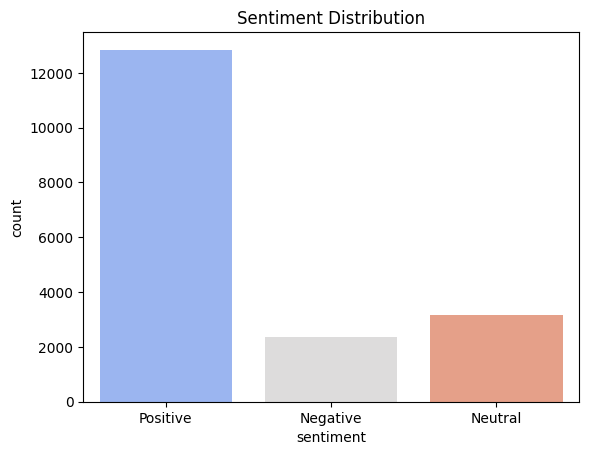

In [ ]:
sns.countplot(x=SA['sentiment'], palette='coolwarm')
plt.title('Sentiment Distribution')
plt.show()

SAVE PROCESSED DATASET

In [ ]:
SA.to_csv("processed_sentiment_data.csv", index=False)


DISPLAY SENTIMENT STATISTICS

In [ ]:
print(SA['sentiment'].value_counts())

sentiment
Positive    12843
Neutral      3166
Negative     2355
Name: count, dtype: int64
